In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# need to specify datatype on import!

base = '/Users/sahara/Documents/GW/DataMining/Final-Project-Group2'
ratings = pd.read_csv(f'{base}/data/IMDb ratings.csv')
movies = pd.read_csv(f'{base}/data/IMDb movies.csv')
names = pd.read_csv(f'{base}/data/IMDb names.csv')
#titles = pd.read_csv('data/IMDb title_principals.csv') --- dont need this table

/Users/sahara/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
def clean_budget(x):
    white = x.find(' ')
    trimmed = x[white+1:]
    return int(trimmed)

In [56]:
US_movies = movies[movies['country'] == 'USA']
US_movies = US_movies[US_movies['budget'].isna() == False]
US_movies['budget'] = US_movies['budget'].apply(clean_budget)

only_votes = ratings[['weighted_average_vote', 'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes']]

In [11]:
ratings.columns


Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

In [21]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

# processing questions:
 - How do we want to deal with movies not made in the US?
     - we can keep them for some analyses and not others
     - budget will be the most annoying to deal with cause there's so many different currencies, might be easiest to stick to only US made movies when doing budget analysis, especially cause if we're handling inflation too, going between inflation along with changing inflation rates over time would be annoying
     
# To Do:
 - clean the budget column

## columns to use:
 - budgets
 - income
 - rating
 - men + womens ratings
 - individual rating data
 - genre
     - group
 - duration
 - production company
 - director + writer + actor (maybe)
     - encode these values
 
## main question
 - can we predict weighted average
 - can we predict genre
     - clustering genre (first maybe)
     


In [18]:
names.columns

Index(['imdb_name_id', 'name', 'birth_name', 'height', 'bio', 'birth_details',
       'date_of_birth', 'place_of_birth', 'death_details', 'date_of_death',
       'place_of_death', 'reason_of_death', 'spouses_string', 'spouses',
       'divorces', 'spouses_with_children', 'children'],
      dtype='object')

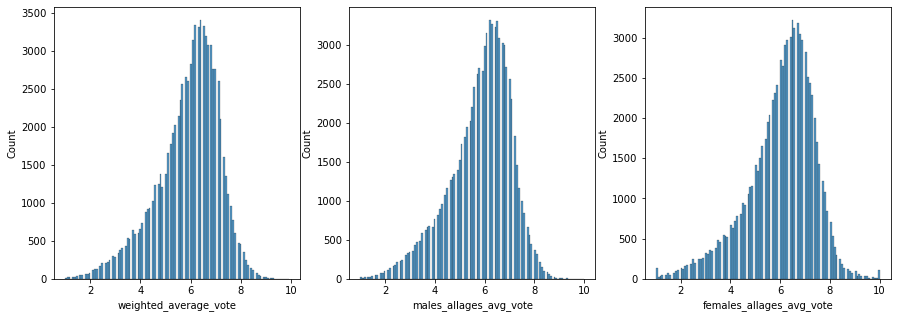

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
sns.histplot(data = ratings, x = 'weighted_average_vote', ax = ax[0])
sns.histplot(data = ratings, x = 'males_allages_avg_vote', ax = ax[1])
sns.histplot(data = ratings, x = 'females_allages_avg_vote', ax = ax[2])